In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

data = pd.read_csv('termproject/preprocessed_data_standard_iqr.csv')

# Separate features and target
X = data.drop(columns=['salary_in_usd'])
y = data['salary_in_usd']

# Function to evaluate GradientBoostingRegressor with k-fold cross-validation
def evaluate_gbr_kfold(X, y, k):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    mse_scores = []
    mae_scores = []
    r2_scores = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        gbr = GradientBoostingRegressor()
        gbr.fit(X_train, y_train)
        y_pred = gbr.predict(X_test)
        
        mse_scores.append(mean_squared_error(y_test, y_pred))
        mae_scores.append(mean_absolute_error(y_test, y_pred))
        r2_scores.append(r2_score(y_test, y_pred))
    
    avg_mse = np.mean(mse_scores)
    avg_mae = np.mean(mae_scores)
    avg_r2 = np.mean(r2_scores)
    
    return avg_mse, avg_mae, avg_r2

# Evaluate GradientBoostingRegressor for k from 2 to 10
results = []
best_score = float('-inf')
best_k = None

for k in range(2, 11):
    avg_mse, avg_mae, avg_r2 = evaluate_gbr_kfold(X, y, k)
    results.append({'k': k, 'Average MSE': avg_mse, 'Average MAE': avg_mae, 'Average R²': avg_r2})
    
    if avg_r2 > best_score:
        best_score = avg_r2
        best_k = k

results_df = pd.DataFrame(results)
print(results_df)

print(f"Best K: {best_k}")

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
gbr = GradientBoostingRegressor()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4]
}

# Define the cross-validation strategy with the best k
cv = KFold(n_splits=best_k, shuffle=True, random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_gbr = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

# Predict on the test set using the best model
y_pred = best_gbr.predict(X_test)

# Calculate evaluation metrics for regression
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test set evaluation metrics with optimal k:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R^2: {r2}")



    k   Average MSE   Average MAE  Average R²
0   2  2.414143e+09  39027.800619    0.280780
1   3  2.406070e+09  38901.444157    0.283808
2   4  2.385344e+09  38779.588583    0.289774
3   5  2.377968e+09  38736.868624    0.291948
4   6  2.373857e+09  38698.909125    0.292206
5   7  2.368478e+09  38643.882474    0.294739
6   8  2.370732e+09  38680.970718    0.293712
7   9  2.379364e+09  38687.330714    0.291329
8  10  2.370831e+09  38688.281556    0.293574
Best K: 7
Best parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}
Test set evaluation metrics with optimal k:
MSE: 2500825747.066665
MAE: 39153.491288838144
R^2: 0.27258080029969556


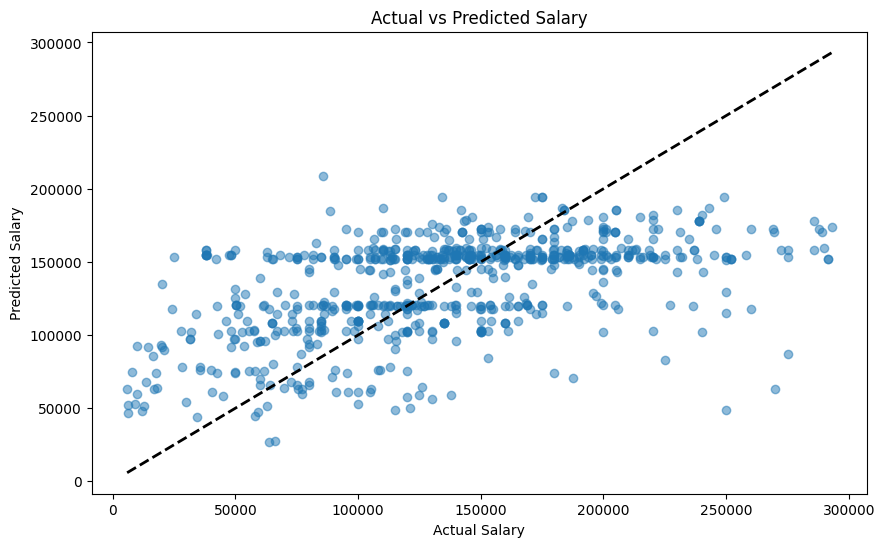

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

data = pd.read_csv('termproject/preprocessed_data_standard_iqr.csv')

X = data.drop(columns=['salary_in_usd'])
y = data['salary_in_usd']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the GradientBoostingRegressor with the best parameters
gbr = GradientBoostingRegressor(learning_rate=0.1, max_depth=4, n_estimators=200)
gbr.fit(X_train, y_train)

# Predict salaries
y_pred = gbr.predict(X_test)

# Plot actual vs predicted salaries
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.show()
